In [1]:
#import libraries
import numpy as np
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#import the raw file

df = pd.read_csv('C:/UofT/Data analysis/TA data analysis_Nita/Phil_Rajib_project/Analysis/Pt1_DCM_chirp_corrected.csv')
df.head(2)

,Wavelength,-500.0,-490.0,-480.0,-470.0,-460.0,-450.0,-440.0,-430.0,-420.0,...,4910.0,4920.0,4930.0,4940.0,4950.0,4960.0,4970.0,4980.0,4990.0,5000.0
0,549.8464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,550.0243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#set the first column as the index

df1 = df.set_index('Wavelength')
df1.head(2)

,-500.0,-490.0,-480.0,-470.0,-460.0,-450.0,-440.0,-430.0,-420.0,-410.0,...,4910.0,4920.0,4930.0,4940.0,4950.0,4960.0,4970.0,4980.0,4990.0,5000.0
Wavelength,,,,,,,,,,,,,,,,,,,,,
549.8464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550.0243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# change the column values to float type

k = [float(i) for i in list(df1.columns)]
df1.columns = k

In [5]:
#define dunction that plots the dataframe

def plot_df(df, vmin, vmax):    
    
    #plotting the data

    x1 = df.columns
    y1 = df.index
    z1 = df
    X1,Y1 = np.meshgrid(x1,y1)
    Z1 = z1
    img = plt.contourf(X1,Y1,Z1,50, cmap='jet', vmin=-vmin, vmax=vmax )
    plt.colorbar(img)
    return

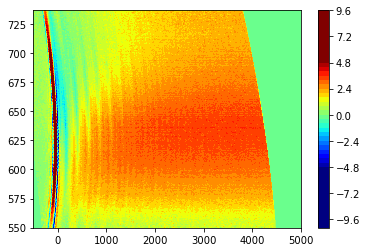

In [6]:
plot_df(df1, 5,5)

In [7]:
from scipy.optimize import curve_fit
from scipy.special import erf

def func_B(t, t_1):
    B=20
    t0 = 2.38110371e+02
    f = (np.exp((B/(2*1.66511*t_1))**2 - ((t-t0)/t_1))*0.5*(erf(((t-t0)/B)*1.66511 - (B/(2*1.66511*t_1))) + 1)) 
    return f   

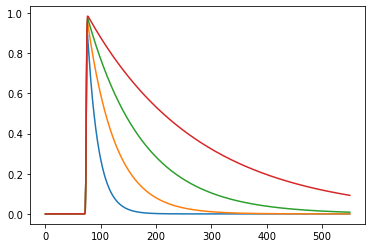

In [8]:
# t0=2.38110371e+02
time = [200, 500, 1000, 2000]
t1 = list(df1.columns)

for i in range(len(time)):
    plt.plot(func_B (np.array(t1), time[i]))


In [9]:
func_B (np.array(t1), 200).shape

(551,)

In [10]:
# n is the number of components

n = 4
T_matrix = np.zeros(shape=(n, df1.shape[1]))

In [11]:
T_matrix.shape

(4, 551)

In [12]:
for i in range (n):
    T_matrix[i-1] = func_B (np.array(t1), time[i-1])

In [13]:
T_matrix  # this is the Time matrix that you want; you need to calculate teh inverse of that

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.05253229e-11, 4.80611738e-11, 4.57172027e-11],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.60868590e-05, 7.45802383e-05, 7.31034506e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.72246357e-03, 8.63567361e-03, 8.54974722e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.33932882e-02, 9.29274872e-02, 9.24640094e-02]])

In [14]:
#calculate the pseudo-inverse of a matrix

T_matrix_inv = np.linalg.pinv(T_matrix)

In [15]:
T_matrix_inv.shape

(551, 4)

In [16]:
T_matrix.shape

(4, 551)

In [17]:
# calculate DT^-1

S_bar = np.matmul(df1, T_matrix_inv)

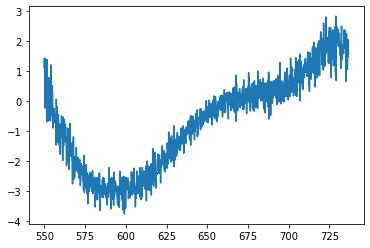

In [18]:
plt.plot(S_bar[1-1])

In [19]:
type(range(4))

range

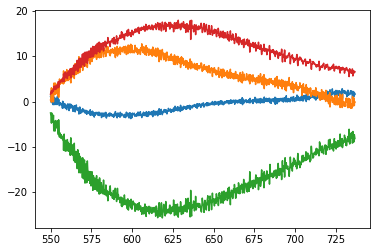

In [20]:
for i in list(range(4)):
    plt.plot(S_bar[i])

In [21]:
#construct S_bar*T

pseudo_data = np.matmul(S_bar, T_matrix)

In [22]:
pseudo_data.shape

(1052, 551)

In [23]:
# optimization

opt = (np.linalg.norm(df1 - pseudo_data))**2

In [24]:
opt

nan

In [25]:
opt.max()

nan

In [26]:
# plot_df(opt, 0.2, 0.2)

In [27]:
T_matrix[0] = func_B (np.array(t1), 200)

In [28]:
T_matrix.shape

(4, 551)

In [29]:
T_matrix

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        5.05253229e-11, 4.80611738e-11, 4.57172027e-11],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        7.60868590e-05, 7.45802383e-05, 7.31034506e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        8.72246357e-03, 8.63567361e-03, 8.54974722e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.33932882e-02, 9.29274872e-02, 9.24640094e-02]])

In [30]:
def func_B(t, t_i):
    B=20
    t0 = 2.38110371e+02
    f = (np.exp((B/(2*1.66511*t_i))**2 - ((t-t0)/t_i))*0.5*(erf(((t-t0)/B)*1.66511 - (B/(2*1.66511*t_i))) + 1)) 
    return f

In [31]:
def global_analysis(time):
    
    n = 4
    t1 = list(df1.columns)
    
    T_matrix = np.zeros(shape=(n, df1.shape[1]))  # n is the number of components
    
    for i in range (n):
        T_matrix[i-1] = func_B (np.array(t1), time[i-1]) # this is the Time matrix that you want; 
                                                     # you need to calculate teh inverse of that
        
    T_matrix_inv = np.linalg.pinv(T_matrix)       #calculate the pseudo-inverse of a matrix
    
    S_bar = np.matmul(df1, T_matrix_inv)         # calculate DT^-1
    
    pseudo_data = np.matmul(S_bar, T_matrix)    #construct S_bar*T
    
    pseudo_data.columns = df1.columns         #reassign the columns
    
    opt = (np.linalg.norm(df1 - pseudo_data))**2      # define the matrix to optimize
    
    return opt
#     return S_bar
    

In [32]:
# time = [200, 500, 1000, 2000]

global_analysis (time)

531876.1560697469

In [33]:
df1.head(5)

,-500.0,-490.0,-480.0,-470.0,-460.0,-450.0,-440.0,-430.0,-420.0,-410.0,...,4910.0,4920.0,4930.0,4940.0,4950.0,4960.0,4970.0,4980.0,4990.0,5000.0
Wavelength,,,,,,,,,,,,,,,,,,,,,
549.8464,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550.0243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550.2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550.3801,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550.5580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
# this is teh optimization

from scipy.optimize import least_squares, minimize, basinhopping


t_guess = [5 , 20000 , 1000, 30000]
# res_2 = minimize(global_analysis, t_guess, method='Nelder-Mead')
# res_3 = basinhopping(global_analysis, t_guess, T= 1.0)
res_3 = least_squares(global_analysis, t_guess)
# res_1 = least_squares(global_analysis, t_guess, bounds=(0, 10000))

In [52]:
res_3

 active_mask: array([0., 0., 0., 0.])
        cost: 93322267625.6387
         fun: array([432023.76699816])
        grad: array([-4043.01733264,  1345.05056186,  6494.78846605,   458.64885606])
         jac: array([[-0.00935832,  0.00311337,  0.01503341,  0.00106163]])
     message: '`xtol` termination condition is satisfied.'
        nfev: 30
        njev: 19
  optimality: 6494.788466052864
      status: 3
     success: True
           x: array([28867.60637171, 32071.84140575, 39879.67611427, 37836.17221845])

In [53]:
# rebuilt S_bar with the optimized values

def DAS (time):
    
    t1 = list(df1.columns)
    n = 4
    T_matrix = np.zeros(shape=(n, df1.shape[1]))  # n is the number of components
    
    for i in range (n):
        T_matrix[i-1] = func_B (np.array(t1), time[i-1]) # this is the Time matrix that you want; 
                                                     # you need to calculate teh inverse of that
        
    T_matrix_inv = np.linalg.pinv(T_matrix)       #calculate the pseudo-inverse of a matrix
    
    S_bar = np.matmul(df1, T_matrix_inv)         # calculate DT^-1
    
    return S_bar




In [54]:
def pseudo_data (time):
    
    n = 4
    t1 = list(df1.columns)
    
    T_matrix = np.zeros(shape=(n, df1.shape[1]))  # n is the number of components
    
    for i in range (n):
        T_matrix[i-1] = func_B (np.array(t1), time[i-1]) # this is the Time matrix that you want; 
                                                     # you need to calculate teh inverse of that
        
    T_matrix_inv = np.linalg.pinv(T_matrix)       #calculate the pseudo-inverse of a matrix
    
    S_bar = np.matmul(df1, T_matrix_inv)         # calculate DT^-1
    
    pseudo_data = np.matmul(S_bar, T_matrix)    #construct S_bar*T
    
    pseudo_data.columns = df1.columns         #reassign the columns
    
    return pseudo_data
    
    

In [55]:
x = [11493.22366105, 11400.55744635, -1391.88889464, 11489.75092222]

das = DAS(x)
PD = pseudo_data(x)

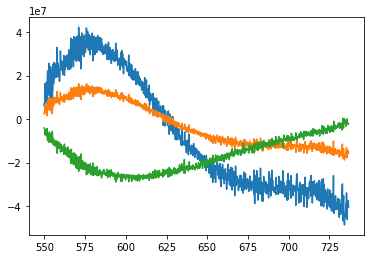

In [56]:
#DAS after optimization

plt.plot(das[0])
plt.plot(das[1]*10)
plt.plot(das[2]*100000000)

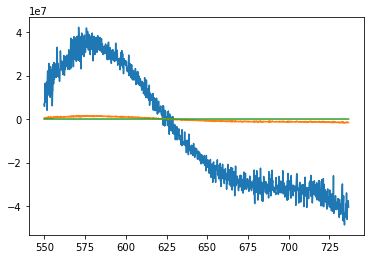

In [57]:
for i in list(range(3)):
    plt.plot(das[i])

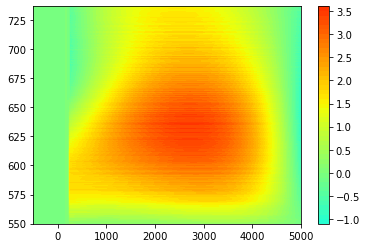

In [58]:
plot_df(PD, 5, 5)

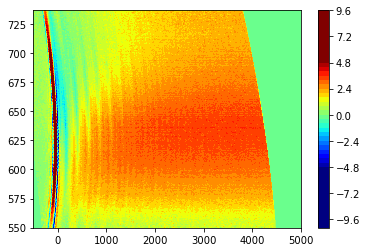

In [59]:
plot_df(df1, 5, 5)

In [43]:
def global_analysis(n, t_1, t_2, t_3, t_4):
    
    time = [t_1, t_2, t_3, t_4]
    t1 = list(df1.columns)
    
    T_matrix = np.zeros(shape=(n, df1.shape[1]))  # n is the number of components
    
    for i in range (n):
    T_matrix[i-1] = func_B (np.array(t1), time[i-1]) # this is the Time matrix that you want; 
                                                     # you need to calculate teh inverse of that
        
    T_matrix_inv = np.linalg.pinv(T_matrix)       #calculate the pseudo-inverse of a matrix
    
    S_bar = np.matmul(df1, T_matrix_inv)         # calculate DT^-1
    
#     pseudo_data = np.matmul(S_bar, T_matrix)    #construct S_bar*T
    
#     opt = (np.linalg.norm(df1 - pseudo_data))**2      # optimization

    return S_bar
    

IndentationError: expected an indented block (<ipython-input-43-1be0c277d976>, line 9)